## Hierarchical

In [1]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt

In [3]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data.csv


In [4]:
cr=pd.read_csv("crime_data.csv")
cr

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
def minmax_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [6]:
cr= minmax_func(cr.iloc[:,1:])
cr.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


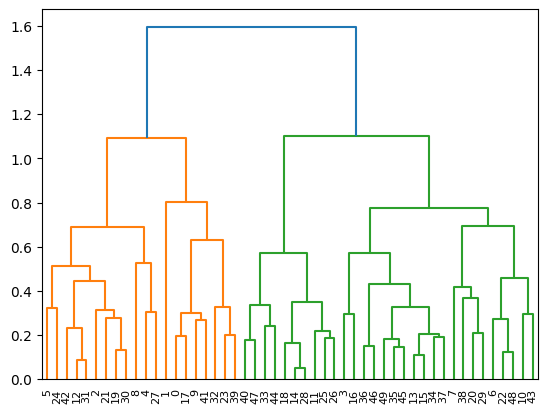

In [7]:
#dendrogram=sch.dendrogram(sch.linkage(cr,method='single'))
dendrogram=sch.dendrogram(sch.linkage(cr,method='complete'))
#dendrogram=sch.dendrogram(sch.linkage(cr,method='centroid'))
#dendrogram=sch.dendrogram(sch.linkage(cr,method='average'))

In [11]:
hic =AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')
hic

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [12]:
y_hic=hic.fit_predict(cr)
y_hic

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1])

In [13]:
cr['h_clusterid']=y_hic
cr

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0


In [14]:
cr[cr['h_clusterid']==0]

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0
12,0.578313,0.698630,0.864407,0.431525,0
17,0.879518,0.698630,0.576271,0.385013,0
19,0.632530,0.873288,0.593220,0.529716,0


In [15]:
cr[cr['h_clusterid']==1]

,Murder,Assault,UrbanPop,Rape,h_clusterid
3,0.481928,0.496575,0.305085,0.315245,1
6,0.150602,0.222603,0.762712,0.098191,1
7,0.307229,0.660959,0.677966,0.219638,1
10,0.271084,0.003425,0.864407,0.333333,1
13,0.385542,0.232877,0.559322,0.354005,1
15,0.313253,0.239726,0.576271,0.276486,1
16,0.536145,0.219178,0.338983,0.232558,1
20,0.216867,0.356164,0.898305,0.232558,1
22,0.114458,0.092466,0.576271,0.196382,1
29,0.397590,0.390411,0.966102,0.297158,1


In [16]:
cr[cr['h_clusterid']==2]

,Murder,Assault,UrbanPop,Rape,h_clusterid
11,0.108434,0.256849,0.372881,0.178295,2
14,0.084337,0.037671,0.423729,0.103359,2
18,0.078313,0.130137,0.322034,0.012920,2
25,0.313253,0.219178,0.355932,0.235142,2
26,0.210843,0.195205,0.508475,0.237726,2
28,0.078313,0.041096,0.406780,0.056848,2
33,0.000000,0.000000,0.203390,0.000000,2
40,0.180723,0.140411,0.220339,0.142119,2
44,0.084337,0.010274,0.000000,0.100775,2
47,0.295181,0.123288,0.118644,0.051680,2


In [17]:
cr[cr['h_clusterid']==3]

,Murder,Assault,UrbanPop,Rape,h_clusterid


In [18]:
cr.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,0.684639,0.720034,0.616949,0.564987
1,0.296084,0.298973,0.657627,0.279070
2,0.143373,0.115411,0.293220,0.111886


In [19]:
cr['h_clusterid'].value_counts()

0    20
1    20
2    10
Name: h_clusterid, dtype: int64

<Axes: >

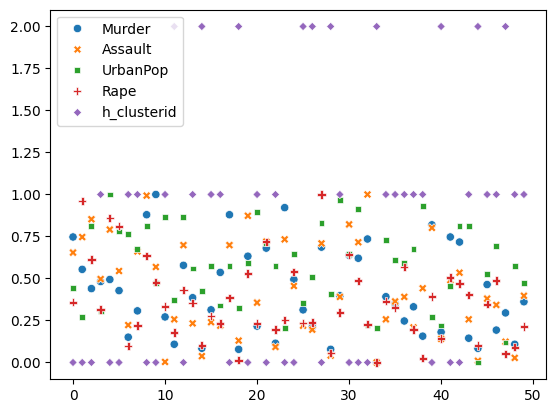

In [20]:
import seaborn as sns
sns.scatterplot(data=cr)

## K-Means

In [21]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [22]:
from google.colab import files
uploaded=files.upload()

Saving crime_data.csv to crime_data (1).csv


In [23]:
cr = pd.read_csv('crime_data.csv')
cr

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [24]:
def minmax_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)


x=minmax_func(cr.iloc[:,1:])
x

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_cr=scaler.fit_transform(cr.iloc[:,1:])
scaled_cr

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[13.184122550256445]
[13.184122550256445, 6.596893867946198]
[13.184122550256445, 6.596893867946198, 5.010878493006418]
[13.184122550256445, 6.596893867946198, 5.010878493006418, 3.6834561535859143]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[13.184122550256445, 6.596893867946198, 5.010878493006418, 3.6834561535859143, 3.2250722560447898]
[13.184122550256445, 6.596893867946198, 5.010878493006418, 3.6834561535859143, 3.2250722560447898, 2.8520398885211113]
[13.184122550256445, 6.596893867946198, 5.010878493006418, 3.6834561535859143, 3.2250722560447898, 2.8520398885211113, 2.584866411431045]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[13.184122550256445, 6.596893867946198, 5.010878493006418, 3.6834561535859143, 3.2250722560447898, 2.8520398885211113, 2.584866411431045, 2.314201689711637]
[13.184122550256445, 6.596893867946198, 5.010878493006418, 3.6834561535859143, 3.2250722560447898, 2.8520398885211113, 2.584866411431045, 2.314201689711637, 2.1259292651810116]
[13.184122550256445, 6.596893867946198, 5.010878493006418, 3.6834561535859143, 3.2250722560447898, 2.8520398885211113, 2.584866411431045, 2.314201689711637, 2.1259292651810116, 1.8528270051870224]


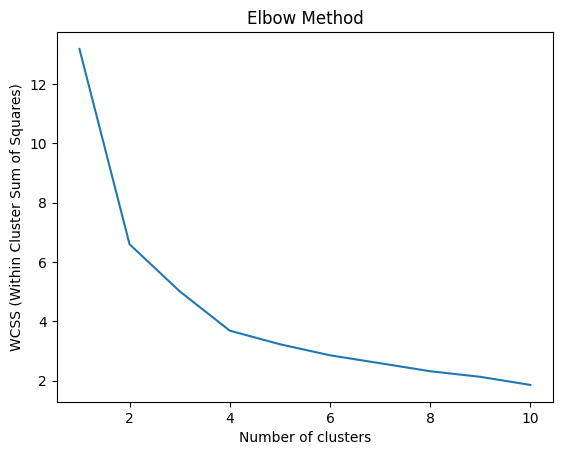

In [26]:
wcss=[]
for i in range (1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

  print(wcss)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [27]:
from sklearn.cluster import KMeans
cluster_new =KMeans(4,random_state=0)
cluster_new.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [28]:
cluster_new.labels_

array([2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 3, 0, 1, 3, 1, 3, 2, 3, 0, 1, 0,
       3, 2, 1, 3, 3, 0, 3, 1, 0, 0, 2, 3, 1, 1, 1, 1, 1, 2, 3, 2, 0, 1,
       3, 1, 1, 3, 3, 1], dtype=int32)

In [29]:
cr['Clusterid_New']=cluster_new.labels_
cr

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clusterid_New
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


In [30]:
cluster_new.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868]])

In [31]:
cr.groupby('Clusterid_New').agg(['mean']).reset_index()

<ipython-input-31-79167ccf94ca>:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cr.groupby('Clusterid_New').agg(['mean']).reset_index()


,Clusterid_New,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,10.966667,264.000000,76.500000,33.608333
1,1,5.852941,141.176471,73.647059,19.335294
2,2,13.937500,243.625000,53.750000,21.412500
3,3,3.600000,78.538462,52.076923,12.176923


In [32]:
cr['Clusterid_New'].value_counts()

1    17
3    13
0    12
2     8
Name: Clusterid_New, dtype: int64

<Axes: >

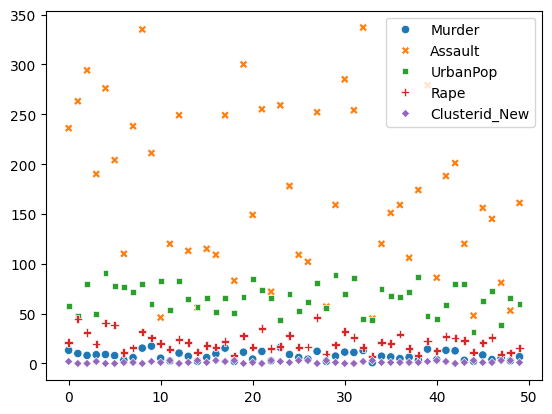

In [33]:
import seaborn as sns
sns.scatterplot(data=cr)

## DBSCAN

In [34]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [35]:
from google.colab import files
uploaded= files.upload()

Saving crime_data.csv to crime_data (2).csv


In [36]:
cr = pd.read_csv('crime_data.csv')
cr

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [37]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [38]:
cr.drop('Unnamed: 0',axis=1,inplace =True)

In [39]:
data=cr.values
data

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [40]:
stscaler=StandardScaler()
X=stscaler.fit_transform(data)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [41]:
stscaler=StandardScaler()
X=stscaler.fit_transform(data)
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [42]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(X)

DBSCAN(eps=2)

In [43]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [44]:
cr['Clusterid']=dbscan.labels_
cr

,Murder,Assault,UrbanPop,Rape,Clusterid
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,0


In [45]:
cr['Clusterid'].value_counts()

 0    49
-1     1
Name: Clusterid, dtype: int64

In [46]:
(len(cr[cr['Clusterid']==-1])/len(cr))*100

2.0

In [47]:
X= metrics.silhouette_score(X,dbscan.labels_)
X

0.23455598753159795

In [48]:
cr.groupby(cr['Clusterid']).mean()

,Murder,Assault,UrbanPop,Rape
Clusterid,,,,
-1,10.000000,263.000000,48.000000,44.500000
0,7.742857,168.877551,65.897959,20.757143
